**Specific Question to ask about the data:**
can player demographics and play-behaviour (total playtime, player age, experience, gender) predict whether a player subscribes to the newsletter?

In [1]:
getwd()

[1] "/home/jovyan/work/swaggest-pino"

In [2]:
list.files()

[1] "Data Description.ipynb"               
[2] "Exploring relationships in data.ipynb"
[3] "Individual Planning Project"          
[4] "players.csv"                          
[5] "README.md"                            
[6] "sessions.csv"                         
[7] "untitled.txt"

In [3]:
library(tidyverse)
players_original <- read_csv("players.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
print(players_original, rows = 10)

# A tibble: 196 × 7
   experience subscribe hashedEmail              played_hours name  gender   Age
   <chr>      <lgl>     <chr>                           <dbl> <chr> <chr>  <dbl>
 1 Pro        TRUE      f6daba428a5e19a3d475748…         30.3 Morg… Male       9
 2 Veteran    TRUE      f3c813577c458ba0dfef809…          3.8 Chri… Male      17
 3 Veteran    FALSE     b674dd7ee0d24096d1c0196…          0   Blake Male      17
 4 Amateur    TRUE      23fe711e0e3b77f1da7aa22…          0.7 Flora Female    21
 5 Regular    TRUE      7dc01f10bf20671ecfccdac…          0.1 Kylie Male      21
 6 Amateur    TRUE      f58aad5996a435f16b0284a…          0   Adri… Female    17
 7 Regular    TRUE      8e594b8953193b26f498db9…          0   Luna  Female    19
 8 Amateur    FALSE     1d2371d8a35c8831034b25b…          0   Emer… Male      21
 9 Amateur    TRUE      8b71f4d66a38389b7528bb3…          0.1 Nata… Male      47
10 Veteran    TRUE      bbe2d83de678f519c4b3daa…          0   Nyla  Female    22
# ℹ 186 

In [5]:
players_original <- tibble(players_original)

In [6]:
player_data <- players_original |>
    select(experience, subscribe, played_hours, gender, Age)
player_data

experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17
Regular,TRUE,0.0,Female,19
Amateur,FALSE,0.0,Male,21
Amateur,TRUE,0.1,Male,47


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


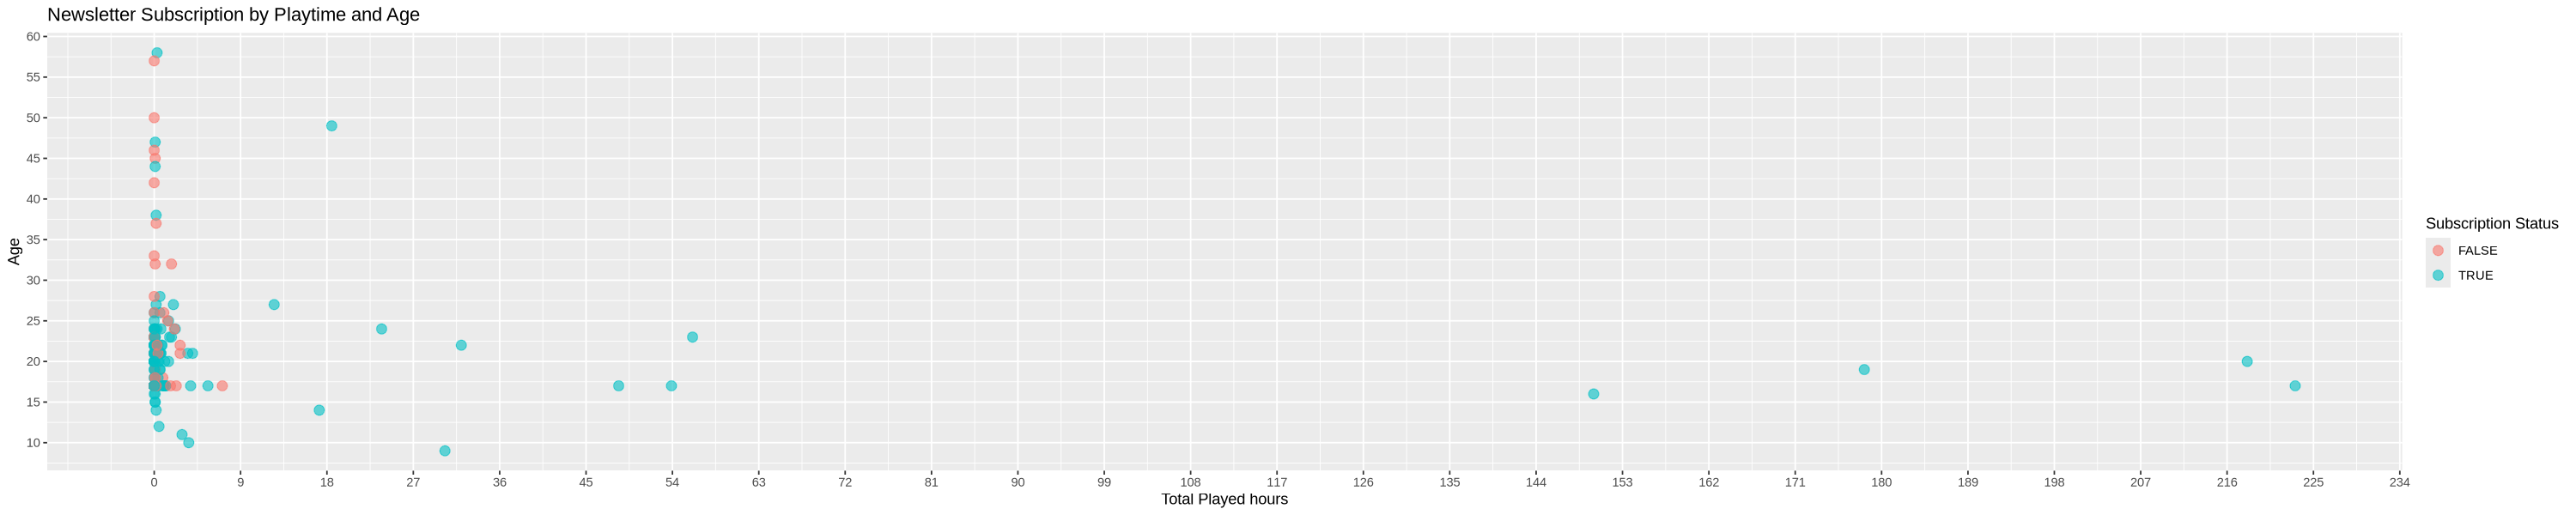

In [13]:
library(ggplot2)
options(repr.plot.width = 25, repr.plot.height = 5)

age_and_played_time <- ggplot(player_data, aes(x=played_hours, y= Age, color = subscribe)) +
    geom_point(alpha = 0.6, size = 3) +
    labs(title = "Newsletter Subscription by Playtime and Age",
         x = "Total Played hours",
         y = "Age",
         color = "Subscription Status") 

age_and_played_time + 
    scale_x_continuous(breaks = seq(0,1000, by = 9)) +
    scale_y_continuous(breaks = seq(0,1000, by = 5))

Notes: 
- when total playtime is around 3 hours or more, players tend to subscribe to the newsletter
- despite low playtime (<2.5 hours), players between the ages of roughly 12-38 show a relatively high subscription rate

other points:
- the older the player, the lesser playtime
- the younger the player (~9-27), the more playtime

Conclude that:
- Older players are generally less likely to subscribe to the newsletter
- Increased playtime is associated with a higher chance of newletter subscription

*This plot suggests a positive relationship between total playtime and likelihood of subscription. However, age appears to have a negative association with subscription lieklihoood, particularly among older players*

**now im gonna compare the other variables' relation to subscription status, first independently.**

In [8]:
player_data

experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17
Regular,TRUE,0.0,Female,19
Amateur,FALSE,0.0,Male,21
Amateur,TRUE,0.1,Male,47


#oookay i guess im going to start and find out who subscribes more each gruop??

#first ill find out w gender


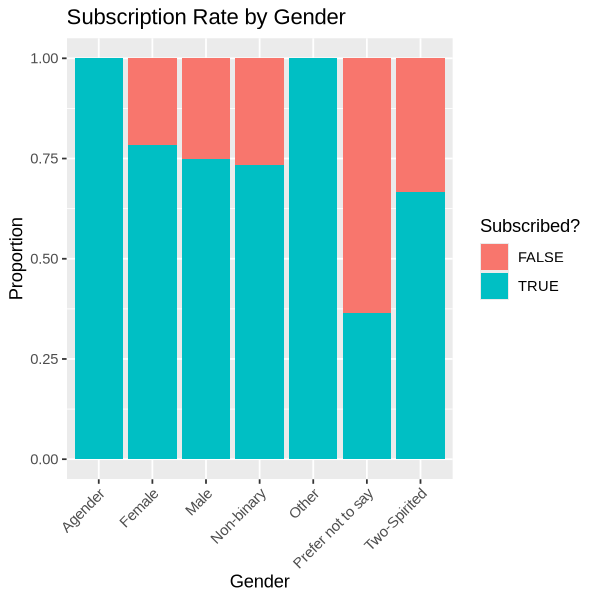

In [9]:
options(repr.plot.width = 5, repr.plot.height = 5)
gender.vs.subscription <- player_data |>
    ggplot(aes(x=gender, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(title = "Subscription Rate by Gender",
         y = "Proportion",
         x = "Gender",
         fill = "Subscribed?") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


print(gender.vs.subscription)

From this data, gender does not appear to have a significant relationship with the likelihood newsletter subscription. The differences in subscription rates across gender identities do not suggest any clear pattern. Any interpretationo here would risk over-claiming or implying casual relationships that the data does not support. Because of this, gender doesn't appear to be a useful predictor for subscription behaviour, and is likely irrelevant for the analysis.

**now, lets see experience!!!**

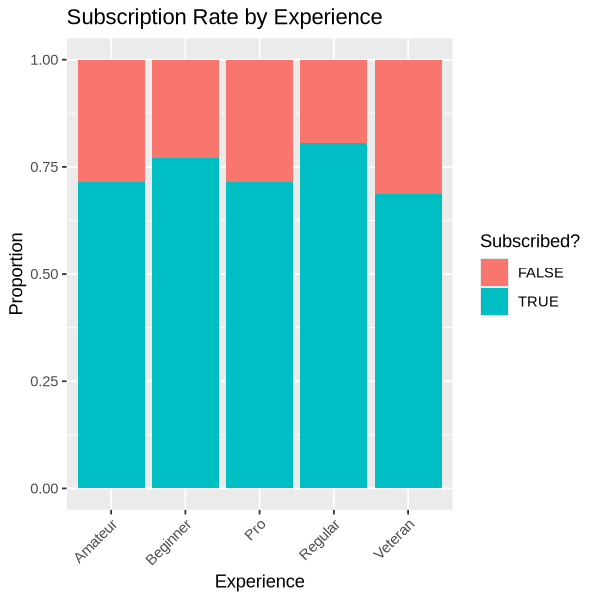

In [10]:
options(repr.plot.width = 5, repr.plot.height = 5)
experience.vs.subscription <- player_data |>
    ggplot(aes(x=experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(title = "Subscription Rate by Experience",
         y = "Proportion",
         x = "Experience",
         fill = "Subscribed?") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


print(experience.vs.subscription)

From this data, experience levels among players also doesn't seem to have a notable relationship with newsletter subscription status. There is little difference of subscription percentages among the experience categories--roughly 75% subscribe, and ~25% don't, across every category. The experience of a player does not appear to meaningfully affect whether or not one subscribes to the newsletter.